# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

#Output file
output_to_file = "../output_file/cities.csv"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
# Build the call
url = "api.openweathermap.org/data/2.5/weather?" 

#Settings
settings = {"units": "imperial", "appid": api_key}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Get data for each city in list
weather_data = []
i=1

#Gather and send calls 
for city in cities:
    
    query_url = f"{url}appid={api_key}&q={city}"
        
    try:
        response = owm.get_current(city, **settings)
        weather_data.append(response)
        
        print(f"Processing Record {i} of {len(cities)} | {city}.")
        i +=1
    
    except: 
        print("City not found. Skipping...")
        i +=1

Processing Record 1 of 613 | thompson.
Processing Record 2 of 613 | mar del plata.
Processing Record 3 of 613 | inhambane.
Processing Record 4 of 613 | atuona.
Processing Record 5 of 613 | saint anthony.
Processing Record 6 of 613 | tuktoyaktuk.
Processing Record 7 of 613 | nhulunbuy.
Processing Record 8 of 613 | saldanha.
Processing Record 9 of 613 | chokurdakh.
Processing Record 10 of 613 | potcoava.
Processing Record 11 of 613 | shingu.
Processing Record 12 of 613 | bundaberg.
Processing Record 13 of 613 | nanortalik.
Processing Record 14 of 613 | rio gallegos.
Processing Record 15 of 613 | provideniya.
Processing Record 16 of 613 | hermanus.
Processing Record 17 of 613 | pevek.
Processing Record 18 of 613 | broken hill.
Processing Record 19 of 613 | at-bashi.
Processing Record 20 of 613 | rikitea.
City not found. Skipping...
Processing Record 22 of 613 | talnakh.
Processing Record 23 of 613 | mataura.
Processing Record 24 of 613 | bethel.
Processing Record 25 of 613 | albany.
Proce

Processing Record 208 of 613 | santa lucia.
Processing Record 209 of 613 | alice springs.
Processing Record 210 of 613 | fort nelson.
Processing Record 211 of 613 | saint-philippe.
Processing Record 212 of 613 | maceio.
Processing Record 213 of 613 | itarema.
Processing Record 214 of 613 | wajima.
Processing Record 215 of 613 | marion.
Processing Record 216 of 613 | general pico.
Processing Record 217 of 613 | camopi.
Processing Record 218 of 613 | aketi.
Processing Record 219 of 613 | kavieng.
Processing Record 220 of 613 | lazaro cardenas.
Processing Record 221 of 613 | sindgi.
Processing Record 222 of 613 | onega.
Processing Record 223 of 613 | tiksi.
City not found. Skipping...
Processing Record 225 of 613 | sao joao da barra.
Processing Record 226 of 613 | gazanjyk.
City not found. Skipping...
Processing Record 228 of 613 | falmouth.
Processing Record 229 of 613 | menongue.
Processing Record 230 of 613 | bagotville.
Processing Record 231 of 613 | sur.
Processing Record 232 of 613 

Processing Record 413 of 613 | manavalakurichi.
Processing Record 414 of 613 | northam.
Processing Record 415 of 613 | calvia.
Processing Record 416 of 613 | maues.
City not found. Skipping...
Processing Record 418 of 613 | taltal.
Processing Record 419 of 613 | beoumi.
Processing Record 420 of 613 | garmsar.
Processing Record 421 of 613 | camden.
Processing Record 422 of 613 | la ronge.
Processing Record 423 of 613 | namatanai.
Processing Record 424 of 613 | barcelona.
Processing Record 425 of 613 | lichinga.
Processing Record 426 of 613 | waipawa.
Processing Record 427 of 613 | tura.
Processing Record 428 of 613 | fortuna.
Processing Record 429 of 613 | aykhal.
Processing Record 430 of 613 | mumford.
Processing Record 431 of 613 | palmer.
City not found. Skipping...
Processing Record 433 of 613 | arman.
Processing Record 434 of 613 | hayden.
Processing Record 435 of 613 | road town.
Processing Record 436 of 613 | karratha.
Processing Record 437 of 613 | kantabanji.
Processing Record 

In [5]:
#Print one to view format
weather_data[1]

{'coord': {'lon': -67.52, 'lat': -46.43},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 61.94,
  'pressure': 1009.6,
  'humidity': 35,
  'temp_min': 61.94,
  'temp_max': 61.94,
  'sea_level': 1009.6,
  'grnd_level': 988.73},
 'wind': {'speed': 11.79, 'deg': 272.003},
 'clouds': {'all': 0},
 'dt': 1554593631,
 'sys': {'message': 0.0042,
  'country': 'AR',
  'sunrise': 1554548077,
  'sunset': 1554588604},
 'id': 3863379,
 'name': 'Mar del Plata',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Create an "extracts" object to get the temperature, latitude,
# and longitude in each city
summary = ["name", "coord.lat", "coord.lon","main.temp_max", "main.humidity", "wind.speed",\
          "clouds.all"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]

weather_df = pd.DataFrame(data)
weather_df.head()

,0,1,2,3,4,5,6
0,Thompson,55.74,-97.86,32.00,50,5.82,40
1,Mar del Plata,-46.43,-67.52,61.94,35,11.79,0
2,Inhambane,-23.87,35.38,75.98,100,7.43,92
3,Atuona,-9.80,-139.03,83.09,99,13.02,20
4,Saint Anthony,43.97,-111.68,50.00,43,21.92,75


In [16]:
#Rename columns

weather_df = weather_df.rename(columns ={0: "City",\
                                         1: "Latitude",\
                                         2: "Longitude",\
                                         3: "Temperature(F)",\
                                         4: "Humidity",\
                                         5: "Wind Speed (MPH)",\
                                         6: "Cloudiness"})
weather_df.head()

,City,Latitude,Longitude,Temperature(F),Humidity,Wind Speed (MPH),Cloudiness
0,Thompson,55.74,-97.86,32.00,50,5.82,40
1,Mar del Plata,-46.43,-67.52,61.94,35,11.79,0
2,Inhambane,-23.87,35.38,75.98,100,7.43,92
3,Atuona,-9.80,-139.03,83.09,99,13.02,20
4,Saint Anthony,43.97,-111.68,50.00,43,21.92,75


In [17]:
#Export Data Frame to csv
weather_df.to_csv(output_to_file, sep=',', encoding='utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

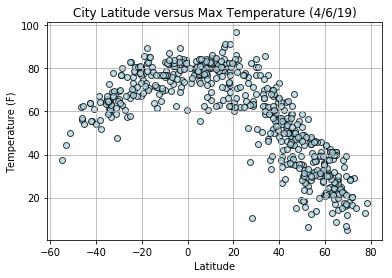

In [26]:
#Plot one
x_axis = weather_df["Latitude"]
y_axis = weather_df["Temperature(F)"]

#Labels
plt.title("City Latitude versus Max Temperature (4/6/19)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#Scatter Plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black",
           alpha=0.75)
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

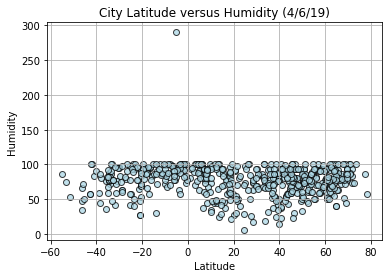

In [27]:
#Plot two
x_axis = weather_df["Latitude"]
y_axis_h = weather_df["Humidity"]

#Labels
plt.title("City Latitude versus Humidity (4/6/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Scatter Plot
plt.scatter(x_axis, y_axis_h, marker="o", facecolors="lightblue", edgecolors="black",
           alpha=0.75)
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

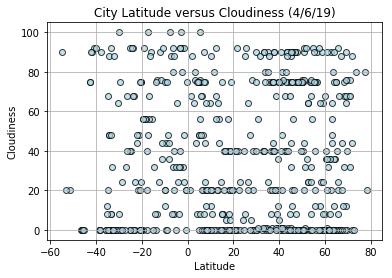

In [28]:
#Plot three
x_axis = weather_df["Latitude"]
y_axis_c = weather_df["Cloudiness"]

#Labels
plt.title("City Latitude versus Cloudiness (4/6/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Scatter Plot
plt.scatter(x_axis, y_axis_c, marker="o", facecolors="lightblue", edgecolors="black",
           alpha=0.75)
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

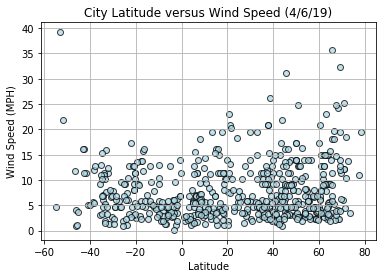

In [29]:
#Plot four
x_axis = weather_df["Latitude"]
y_axis_w = weather_df["Wind Speed (MPH)"]

#Labels
plt.title("City Latitude versus Wind Speed (4/6/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

#Scatter Plot
plt.scatter(x_axis, y_axis_w, marker="o", facecolors="lightblue", edgecolors="black",
           alpha=0.75)
plt.grid()
plt.show()